<a href="https://colab.research.google.com/github/Donalizasaji/DL/blob/main/2348515_DL_Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # w1*x1 + w2*x2 + ... + bias
        return 1 if summation > 0 else 0  # Activation function (Heaviside Step Function)

    def train(self, training_inputs, labels, learning_rate=0.1, epochs=100):
        for _ in range(epochs):
            errors = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += learning_rate * (label - prediction) * inputs
                self.weights[0] += learning_rate * (label - prediction)  # Update bias
                errors += int(label != prediction)
            print(f"Errors: {errors} / {len(labels)}")
            if errors == 0:
                print("All data points classified correctly.")
                break
        print("Final weights:", self.weights)

# Training data for boolean functions
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_labels = np.array([0, 0, 0, 1])

or_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

nand_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
nand_labels = np.array([1, 1, 1, 0])

xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])

# Train the perceptron for each boolean function
and_perceptron = Perceptron(2)
print("Training AND Perceptron:")
and_perceptron.train(and_inputs, and_labels)

or_perceptron = Perceptron(2)
print("\nTraining OR Perceptron:")
or_perceptron.train(or_inputs, or_labels)

nand_perceptron = Perceptron(2)
print("\nTraining NAND Perceptron:")
nand_perceptron.train(nand_inputs, nand_labels)

# XOR requires a different approach due to non-linear separability
print("\nXOR function requires a multi-layer perceptron or a different approach due to non-linear separability.")



Training AND Perceptron:
Errors: 1 / 4
Errors: 3 / 4
Errors: 3 / 4
Errors: 2 / 4
Errors: 1 / 4
Errors: 0 / 4
All data points classified correctly.
Final weights: [-0.2  0.2  0.1]

Training OR Perceptron:
Errors: 1 / 4
Errors: 2 / 4
Errors: 1 / 4
Errors: 0 / 4
All data points classified correctly.
Final weights: [0.  0.1 0.1]

Training NAND Perceptron:
Errors: 2 / 4
Errors: 3 / 4
Errors: 3 / 4
Errors: 0 / 4
All data points classified correctly.
Final weights: [ 0.2 -0.2 -0.1]

XOR function requires a multi-layer perceptron or a different approach due to non-linear separability.


The local minimum occurs at 0.9996038591874287
Number of iterations: 32


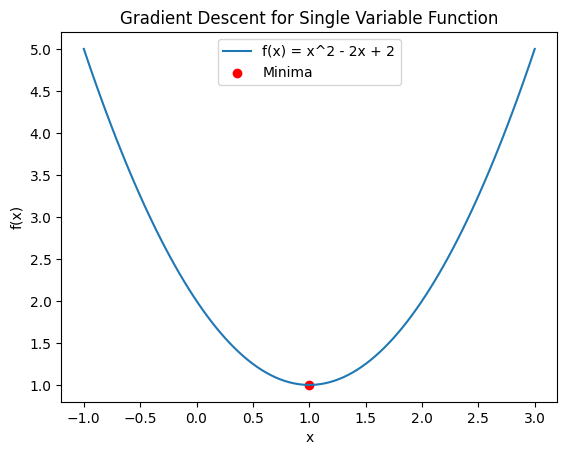

In [3]:
# Single variable gradient descent
import matplotlib.pyplot as plt

def gradient_descent_single_variable(learning_rate, precision, start_point):
    x = start_point
    iterations = 0
    previous_step_size = 1
    max_iterations = 1000  # Maximum number of iterations to prevent infinite loop

    # Define the function and its derivative
    df = lambda x: 2*x - 2
    f = lambda x: x**2 - 2*x + 2

    # Gradient descent algorithm
    while previous_step_size > precision and iterations < max_iterations:
        prev_x = x
        x = x - learning_rate * df(prev_x)
        previous_step_size = abs(x - prev_x)
        iterations += 1

    print("The local minimum occurs at", x)
    print("Number of iterations:", iterations)

    # Visualize the function and the minimum
    x_vals = np.linspace(-1, 3, 100)
    y_vals = f(x_vals)
    plt.plot(x_vals, y_vals, label="f(x) = x^2 - 2x + 2")
    plt.scatter(x, f(x), color='red', label='Minima')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent for Single Variable Function')
    plt.legend()
    plt.show()

# Call the function with desired parameters
gradient_descent_single_variable(0.1, 0.0001, 0.5)

The local minimum occurs at (x = -0.6602778176922445 , y = 0.44395796667090087 )
Number of iterations: 1000


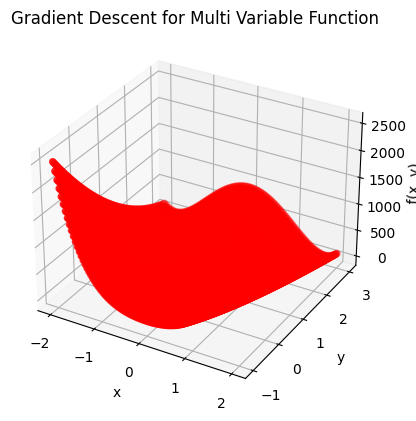

In [4]:


from mpl_toolkits.mplot3d import Axes3D

# Multi variable gradient descent
def gradient_descent_multi_variable(learning_rate, precision, start_point):
    x, y = start_point
    iterations = 0
    previous_step_size = 1
    max_iterations = 1000  # Maximum number of iterations to prevent infinite loop

    # Define the function and its derivatives
    df_dx = lambda x, y: 2*(200*x**3 - 200*x*y + x - 1)
    df_dy = lambda x, y: 200*(y - x**2)
    f = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2

    # Gradient descent algorithm
    while previous_step_size > precision and iterations < max_iterations:
        prev_x, prev_y = x, y
        x = x - learning_rate * df_dx(prev_x, prev_y)
        y = y - learning_rate * df_dy(prev_x, prev_y)
        previous_step_size = np.sqrt((x - prev_x)**2 + (y - prev_y)**2)
        iterations += 1

    print("The local minimum occurs at (x =", x, ", y =", y, ")")
    print("Number of iterations:", iterations)

    # Visualize the function and the minimum
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_vals = np.linspace(-2, 2, 100)
    y_vals = np.linspace(-1, 3, 100)
    x, y = np.meshgrid(x_vals, y_vals)
    z = f(x, y)
    ax.plot_surface(x, y, z, cmap='viridis')
    ax.scatter(x, y, f(x, y), color='red', label='Minima')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Gradient Descent for Multi Variable Function')
    plt.show()

# Call the function with desired parameters
gradient_descent_multi_variable(0.001, 0.0001, [-1.5, 2])
